In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

In [2]:
# import dataset

data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.shape

(768, 9)

## Data exploration & missing value treatment

In [6]:
#Checking for null values in Dataset
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Since the 0 value in Glucose,BloodPressure,SkinThickness,Insulin and BMI variables represent missing values.Lets find now many instances are there in each of the above variables

In [7]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
data[data['Glucose']==0].shape

(5, 9)

out of 768,we have 5 missing values in Gulcose column.

In [9]:
(data[data['BloodPressure']==0]).shape

(35, 9)

out of 768,we have 35 missing values in BloodPressure column.

In [10]:
(data[data['SkinThickness']==0]).shape

(227, 9)

out of 768,we have 227 missing values in SkinThickness column.

In [11]:
(data[data['Insulin']==0]).shape

(374, 9)

out of 768,we have 374 missing values in Insulin column.

In [12]:
(data[data['BMI']==0]).shape

(11, 9)

out of 768,we have 11 missing values in BMI column.

## Since Insulin and SkinThickness are having higher percentages of missing values lets try to fill up the missing values

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

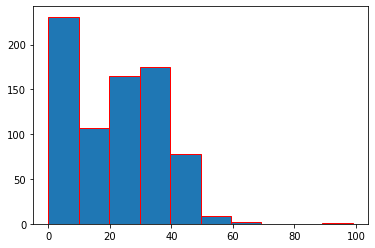

In [13]:
plt.hist(data['SkinThickness'],edgecolor='red')

In [14]:
data[data['SkinThickness']!=0]['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

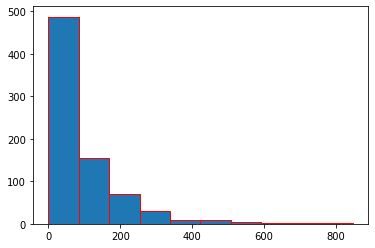

In [15]:
plt.hist(data['Insulin'],edgecolor='red')

In [16]:
data[data['Insulin']!=0]['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

### Mean value of Skinthickness is ~29 and the mean value of Insulin is ~155 let impute the missing values with mean

In [17]:
from numpy import nan
dataset_imputed = data
dataset_imputed[['SkinThickness','Insulin']] = dataset_imputed[['SkinThickness','Insulin']].replace(0, nan)

In [18]:
dataset_imputed.fillna(dataset_imputed.mean(), inplace=True)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

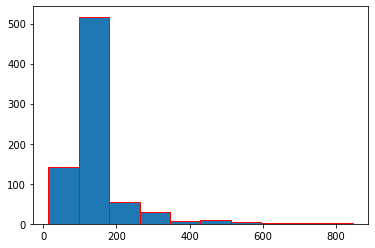

In [19]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
dataset_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [23]:
Positive = dataset_imputed[dataset_imputed['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1


In [24]:
Negative = dataset_imputed[dataset_imputed['Outcome']==0]
Negative.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
10,4,110,92,29.15342,155.548223,37.6,0.191,30,0


In [25]:
dataset_imputed['Glucose'].value_counts().head(5)

100    17
99     17
129    14
125    14
111    14
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

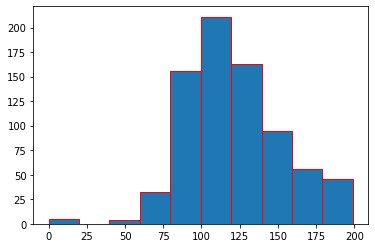

In [26]:
plt.hist(dataset_imputed['Glucose'],edgecolor='red')

In [27]:
dataset_imputed['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

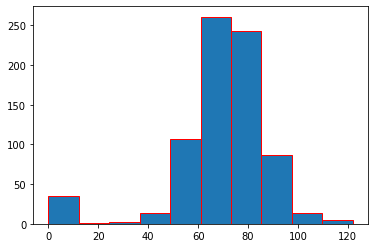

In [28]:
plt.hist(dataset_imputed['BloodPressure'],edgecolor='red')

In [29]:
dataset_imputed['SkinThickness'].value_counts().head(7)

29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
33.00000     20
18.00000     20
Name: SkinThickness, dtype: int64

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

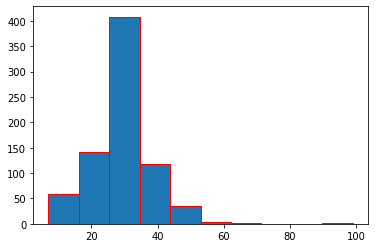

In [30]:
plt.hist(dataset_imputed['SkinThickness'],edgecolor='red')

In [31]:
dataset_imputed['Insulin'].value_counts().head(7)

155.548223    374
105.000000     11
140.000000      9
130.000000      9
120.000000      8
180.000000      7
94.000000       7
Name: Insulin, dtype: int64

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

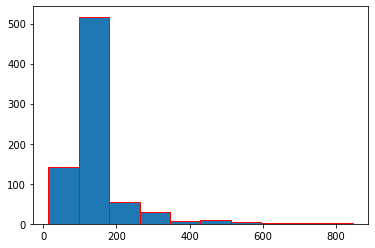

In [32]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')

In [33]:
dataset_imputed['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

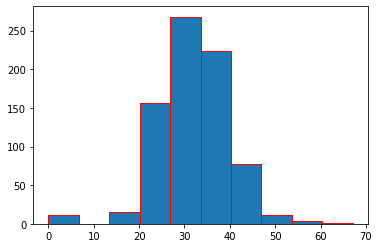

In [34]:
plt.hist(dataset_imputed['BMI'],edgecolor='red')

## Corelation Analysis and Scatter Plots

In [35]:
Positive.shape

(268, 9)

In [36]:
Negative.shape

(500, 9)

In [37]:
Positive['Glucose'].value_counts().head(7)

125    7
158    6
128    6
115    6
129    6
146    5
162    5
Name: Glucose, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 [<matplotlib.patches.Polygon at 0x7f74a6385190>])

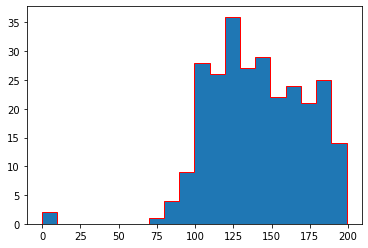

In [38]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20,edgecolor='red')

In [39]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
Name: BloodPressure, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 [<matplotlib.patches.Polygon at 0x7f74a62a0450>])

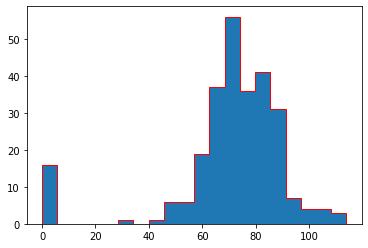

In [40]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20,edgecolor='red')

In [41]:
Positive['SkinThickness'].value_counts().head(7)

29.15342    88
32.00000    14
30.00000     9
33.00000     9
39.00000     8
36.00000     8
37.00000     8
Name: SkinThickness, dtype: int64

(array([  1.,   5.,  11.,  21., 113.,  41.,  34.,  20.,  15.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 [<matplotlib.patches.Polygon at 0x7f74a6213ad0>])

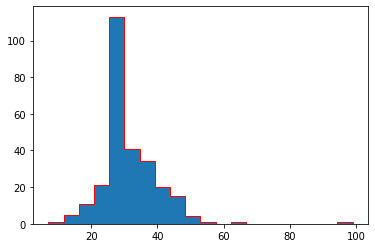

In [42]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20,edgecolor='red')

In [43]:
Positive['Insulin'].value_counts().head(7)

155.548223    138
130.000000      6
180.000000      4
156.000000      3
175.000000      3
144.000000      2
194.000000      2
Name: Insulin, dtype: int64

(array([  4.,  12.,  27., 169.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 [<matplotlib.patches.Polygon at 0x7f74a620bb10>])

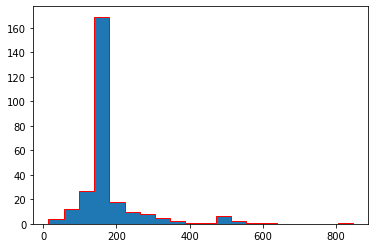

In [44]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20,edgecolor='red')

In [45]:
Positive['BMI'].value_counts().head(7)

32.9    8
31.6    7
33.3    6
30.5    5
32.0    5
31.2    5
32.4    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x7f74a618ee90>])

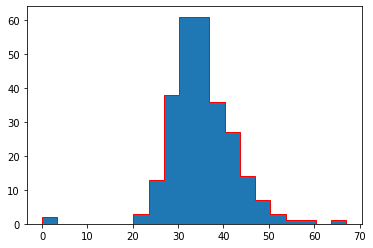

In [46]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20,edgecolor='red')

## Scatterplot

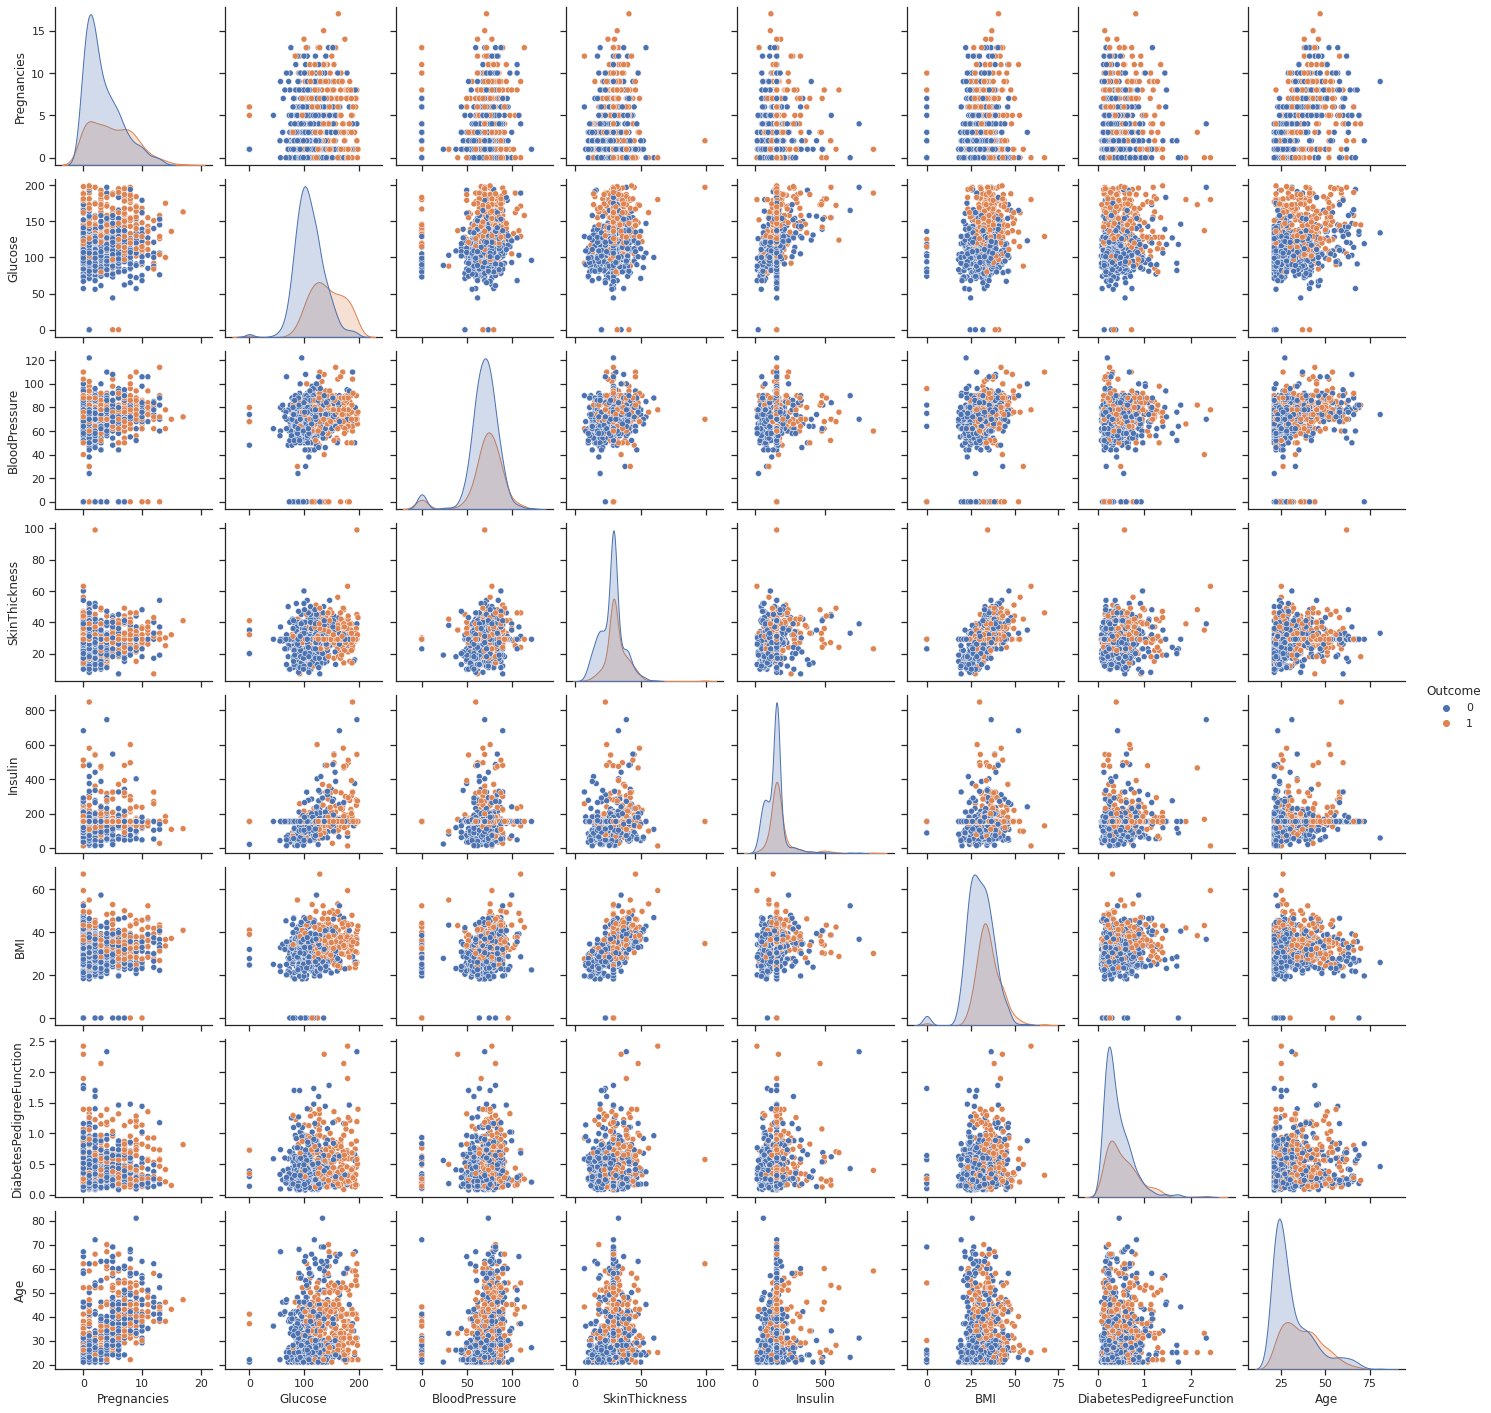

In [47]:
#Pair plots for all dataset
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset_imputed,hue="Outcome")

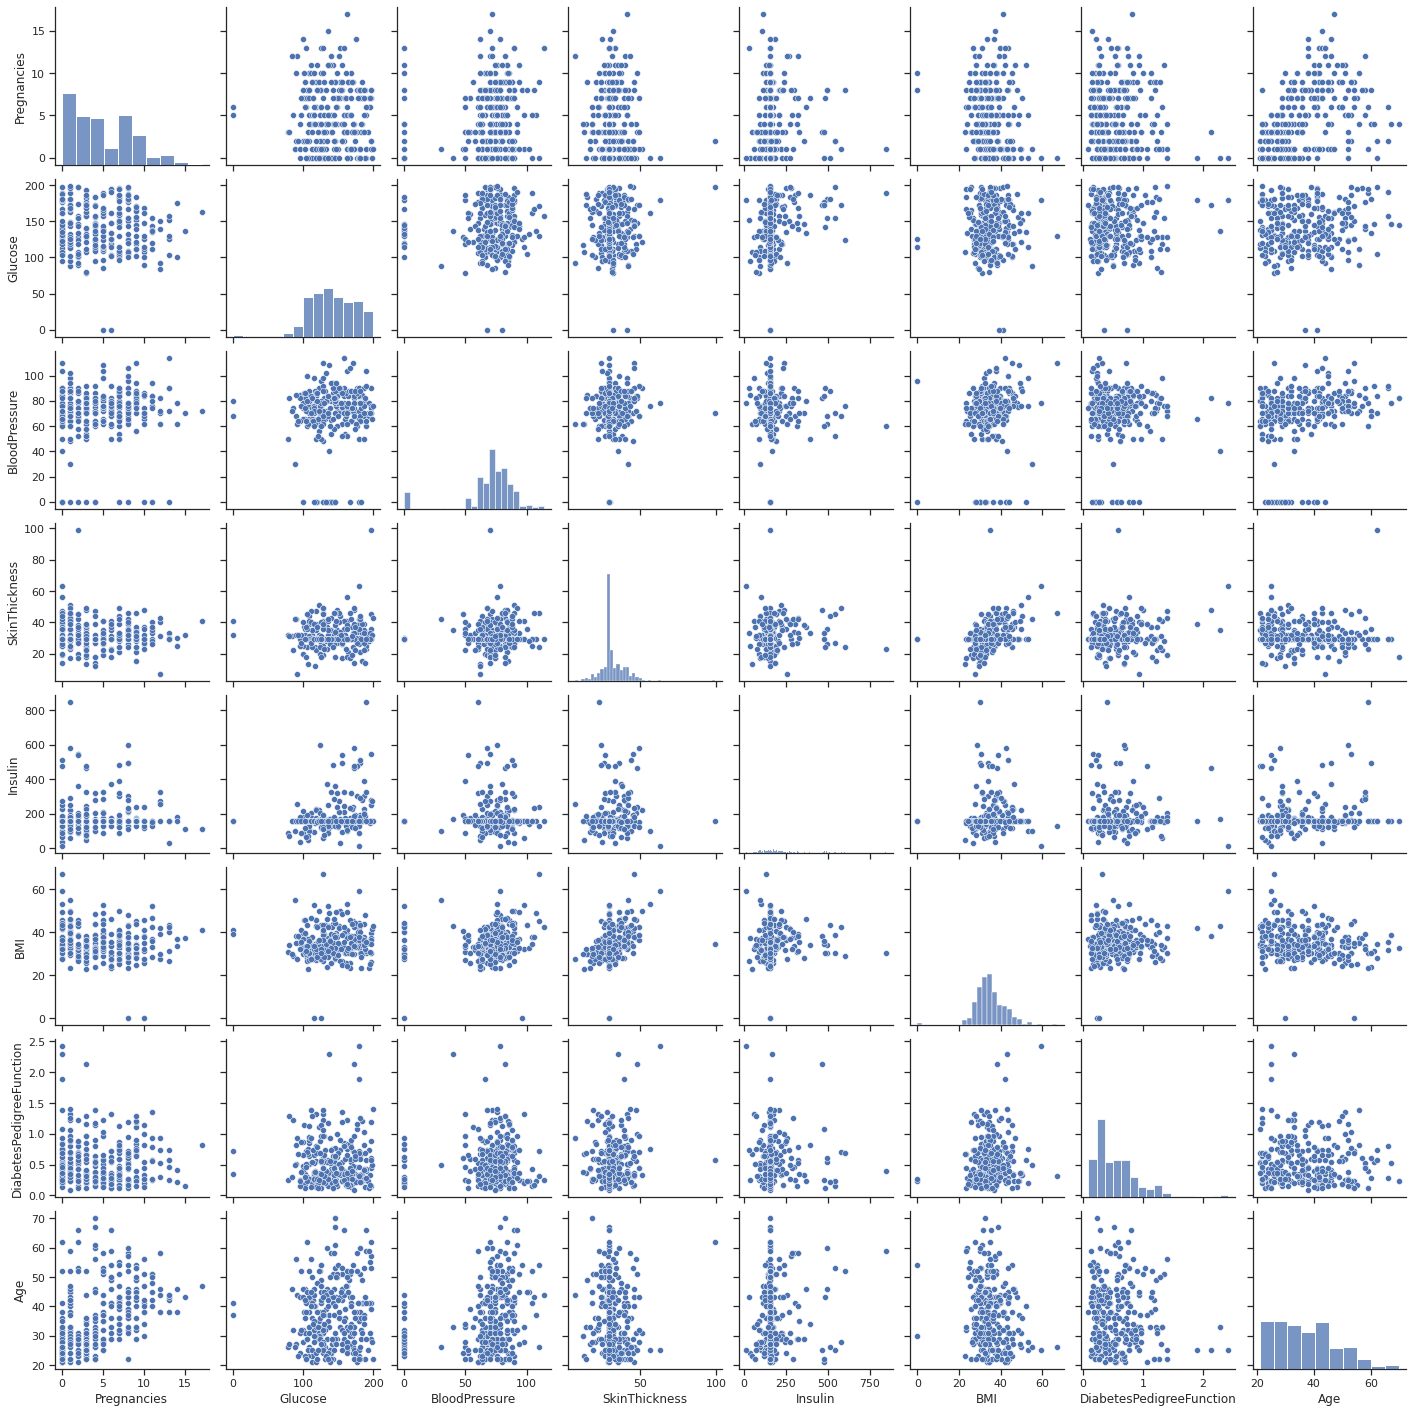

In [48]:
#Pair plots for all Positive cases
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Positive[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

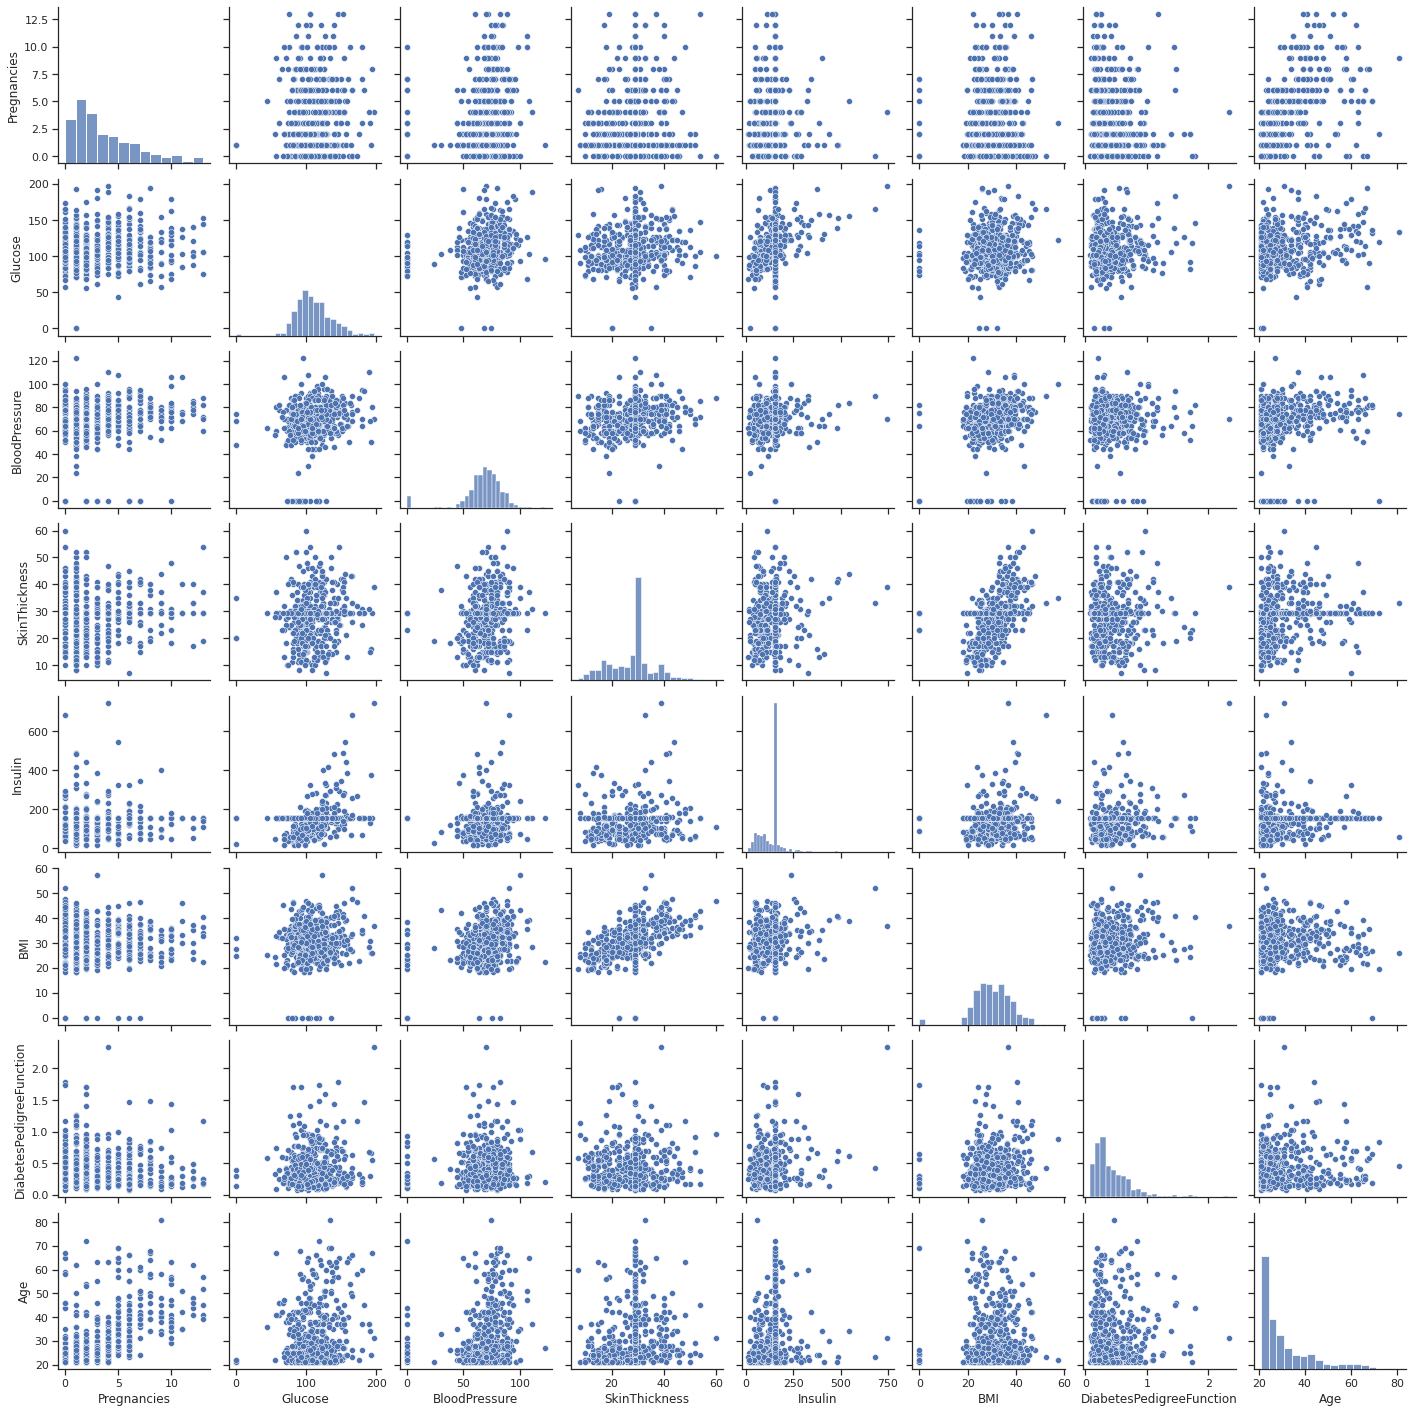

In [49]:
#Pair plots for all Negative cases
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Negative[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])


## Correlation Analysis and Heat map

In [50]:
### correlation matrix
dataset_imputed.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.082989,0.056027,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.182455,0.407699,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.123444,0.045319,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.082989,0.182455,0.123444,1.000000,0.158139,0.480496,0.100966,0.127872,0.215299
Insulin,0.056027,0.407699,0.045319,0.158139,1.000000,0.149468,0.098634,0.136734,0.214411
BMI,0.017683,0.221071,0.281805,0.480496,0.149468,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.100966,0.098634,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.127872,0.136734,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.215299,0.214411,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

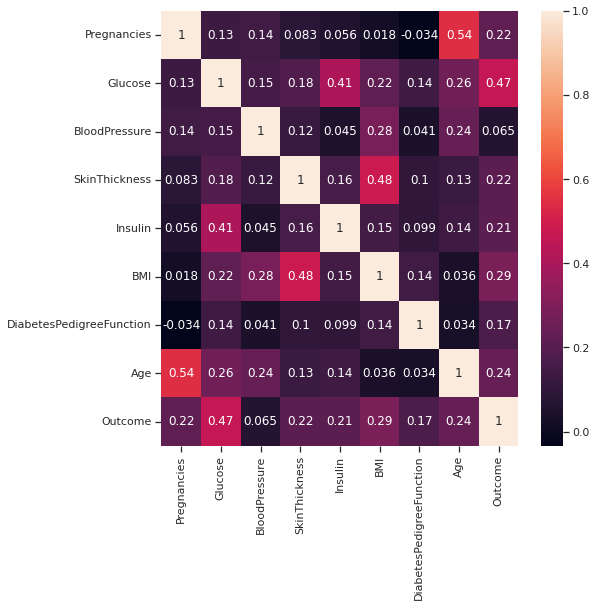

In [51]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset_imputed.corr(),annot=True) 

Correlation Results :

There are not much multicolinearity

Pregnancies and Age have some positive corelation

Glucose has some postive corelation with the outcome variable

Skin thickness and BMI has some positive corelation

Insulin and Glucose has some positive corelation

## Data Modeling:

### Model 1 : Logistic Regression

In [52]:
dataset_imputed.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [53]:
features = dataset_imputed.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset_imputed.iloc[:,8].values

In [54]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [55]:
#Create model
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train,y_train)

LogisticRegression()

In [56]:
print(logRegModel.score(X_train,y_train))
print(logRegModel.score(X_test,y_test))

0.7719869706840391
0.7597402597402597


In [57]:
y_pred = logRegModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[86  9]
 [28 31]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.78      0.53      0.63        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



AUC: 0.715


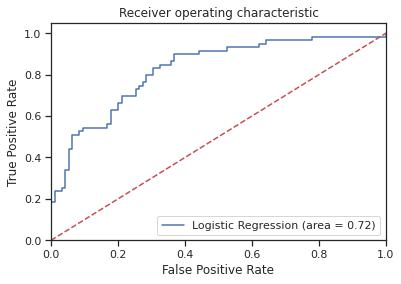

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_roc_auc)
plt.show()

### Model 2 : Decision Tree Classifier

In [61]:
#Hyper Parameter tuning of max_dept
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for i in range(3,20):
    print("For max_depth = ",i)
    DTModel = DecisionTreeClassifier(max_depth=i)
    DTModel.fit(X_train,y_train)
    y_pred = DTModel.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

For max_depth =  3
Accuracy: 0.6883116883116883
For max_depth =  4
Accuracy: 0.7402597402597403
For max_depth =  5
Accuracy: 0.7662337662337663
For max_depth =  6
Accuracy: 0.7532467532467533
For max_depth =  7
Accuracy: 0.7597402597402597
For max_depth =  8
Accuracy: 0.7532467532467533
For max_depth =  9
Accuracy: 0.7402597402597403
For max_depth =  10
Accuracy: 0.7792207792207793
For max_depth =  11
Accuracy: 0.7337662337662337
For max_depth =  12
Accuracy: 0.6948051948051948
For max_depth =  13
Accuracy: 0.7077922077922078
For max_depth =  14
Accuracy: 0.6948051948051948
For max_depth =  15
Accuracy: 0.7142857142857143
For max_depth =  16
Accuracy: 0.7077922077922078
For max_depth =  17
Accuracy: 0.6883116883116883
For max_depth =  18
Accuracy: 0.7012987012987013
For max_depth =  19
Accuracy: 0.6948051948051948


Highest Accuracy of Decision Tree Model can be obtained on Max_Depth = 10

In [62]:
DTModel = DecisionTreeClassifier(max_depth=10)
DTModel.fit(X_train,y_train)
y_pred = DTModel.predict(X_test)

In [63]:
print(DTModel.score(X_train,y_train))
print(DTModel.score(X_test,y_test))

0.9267100977198697
0.7727272727272727


In [64]:
print('Accuracy of Decision Tree regression classifier on test set: {:.2f}'.format(DTModel.score(X_test, y_test)))

Accuracy of Decision Tree regression classifier on test set: 0.77


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[79 16]
 [19 40]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        95
           1       0.71      0.68      0.70        59

    accuracy                           0.77       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.77      0.77      0.77       154



In [67]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.7142857142857143


In [68]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.6779661016949152


AUC: 0.755


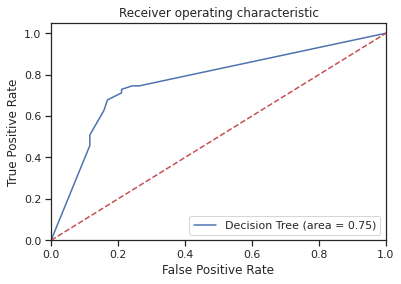

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, DTModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()

### Model 3 : Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [71]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7121320249776985

In [72]:
#Hyper Parameter tuning of n_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

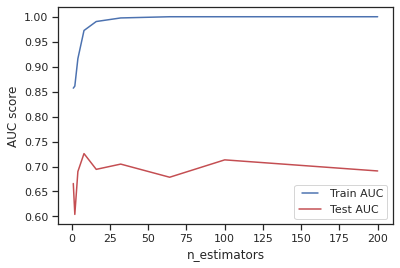

In [73]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [74]:
rfModel = RandomForestClassifier(n_estimators=60)
rfModel.fit(X_train, y_train)
y_pred = rfModel.predict(X_test)

In [75]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6741302408563783

In [76]:
print(rfModel.score(X_train,y_train))
print(rfModel.score(X_test,y_test))

1.0
0.7207792207792207


In [77]:
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(rfModel.score(X_test, y_test)))

Accuracy of Random Forest regression classifier on test set: 0.72


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83 12]
 [31 28]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        95
           1       0.70      0.47      0.57        59

    accuracy                           0.72       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.72      0.71       154



In [80]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.7


In [81]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.4745762711864407


AUC: 0.674


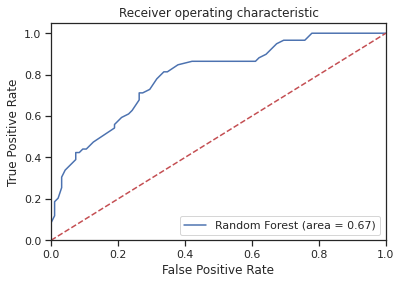

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rfModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()

### Model 4 : Support Vector Machine

In [83]:
#Support Vector Classifier

from sklearn.svm import SVC 
SVMmodel = SVC(kernel='rbf',
           gamma='auto')
SVMmodel.fit(X_train,y_train)
y_pred = SVMmodel.predict(X_test)

In [84]:
print(SVMmodel.score(X_train,y_train))
print(SVMmodel.score(X_test,y_test))

1.0
0.6168831168831169


In [85]:
print('Accuracy of SVMmodel on test set: {:.2f}'.format(SVMmodel.score(X_test, y_test)))

Accuracy of SVMmodel on test set: 0.62


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[95  0]
 [59  0]]


### Model 5 : KNN Classifier

In [89]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
knnClassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
print(knnClassifier.score(X_train,y_train))
print(knnClassifier.score(X_test,y_test))

0.8045602605863192
0.7272727272727273


In [91]:
y_pred = knnClassifier.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.73


AUC: 0.739
True Positive Rate - [0.         0.10169492 0.20338983 0.40677966 0.54237288 0.61016949
 0.77966102 0.93220339 1.        ], False Positive Rate - [0.         0.01052632 0.03157895 0.10526316 0.15789474 0.27368421
 0.50526316 0.66315789 1.        ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

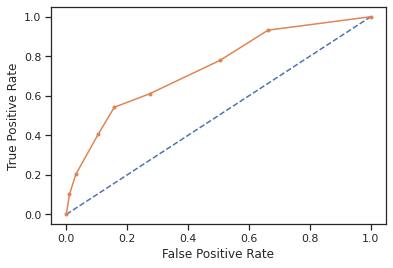

In [92]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities

probs = knnClassifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

f1=0.626 auc=0.759 ap=0.762


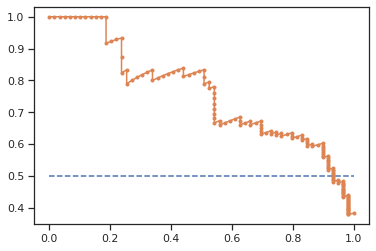

In [93]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = logRegModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = logRegModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.696 auc=0.726 ap=0.626


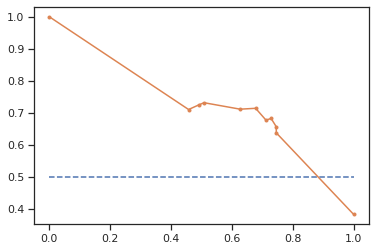

In [94]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = DTModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = DTModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.566 auc=0.716 ap=0.711


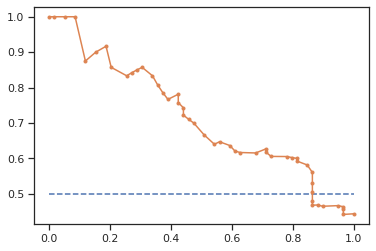

In [95]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = rfModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = rfModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.604 auc=0.661 ap=0.624


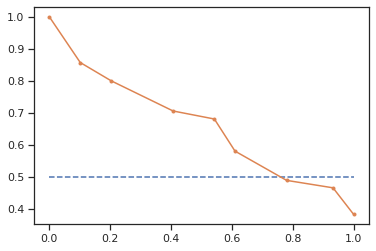

In [96]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = knnClassifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = knnClassifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

## We observed that Decission Tree Classifier is best performing model for this dataset 
## Accuracy of 77%
## Precision = 0.714
## Recall = 0.677
## AUC = 0.755